In [1]:
# import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from scipy.stats import pearsonr

In [2]:
# load the required dataset
# first load the observation data (ERA5)
obs = xr.open_dataset("/home/users/benhutch/ERA5_psl/nao-anomaly/nao-anomaly-ERA5.8yrRM.nc", chunks={"time": 10})
# load the obs dataset which subtracts the multi-model mean basline
# thats not it
# obs_hindcast_bl = xr.open_dataset("/home/users/benhutch/ERA5_psl/nao-anomaly/nao-anomaly-ERA5-hindcast-BL.8yrRM.nc", chunks={"time": 10})

# load the model data for all models
# already pre-processed to multi-model mean
model = xr.open_dataset("/home/users/benhutch/multi-model/multi-model.mean-NAO.nc", chunks={"time": 10})


In [3]:
obs_hindcast_bl

<xarray.Dataset>
Dimensions:    (time: 53, bnds: 2, lon: 1, lat: 1)
Coordinates:
  * time       (time) datetime64[ns] 1963-04-17 ... 2015-04-17
  * lon        (lon) float64 0.0
  * lat        (lat) float64 0.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(10, 2), meta=np.ndarray>
    var151     (time, lat, lon) float32 dask.array<chunksize=(10, 1, 1), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed May 03 09:45:49 2023: cdo runmean,8 /home/users/benhutc...
    frequency:    year
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [4]:
obs

<xarray.Dataset>
Dimensions:    (time: 53, bnds: 2, lon: 1, lat: 1)
Coordinates:
  * time       (time) datetime64[ns] 1963-04-17 ... 2015-04-17
  * lon        (lon) float64 0.0
  * lat        (lat) float64 0.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(10, 2), meta=np.ndarray>
    var151     (time, lat, lon) float32 dask.array<chunksize=(10, 1, 1), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed Apr 26 12:32:18 2023: cdo runmean,8 /home/users/benhutc...
    frequency:    year
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [5]:
# extract the data for the observations
obs_psl = obs["var151"]
obs_time = obs_psl["time"].values
# set the type for the time variable
obs_time = obs_time.astype("datetime64[Y]")

# process the obs data from Pa to hPa
obs_nao_anom = obs_psl[:, 0, 0] / 100

In [6]:
# extract the data for the other observations
obs_bl_psl = obs_hindcast_bl["var151"]
obs_bl_time = obs_bl_psl["time"].values
# set the type for the time variable
obs_bl_time = obs_bl_time.astype("datetime64[Y]")

# process the obs data from Pa to hPa
obs_bl_nao_anom = obs_bl_psl[:, 0, 0] / 100

In [7]:
# extract the data for the multi-model mean
model_psl = model["psl"]
model_time = model_psl["time"].values
# set the type for the time variable
model_time = model_time.astype("datetime64[Y]")

# process the model data from Pa to hPa
model_nao_anom = model_psl[:, 0, 0] / 100

In [8]:
print(obs_time)
print(obs_bl_time)
print(model_time)

['1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971' '1972'
 '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1981' '1982'
 '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992'
 '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002'
 '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015']
['1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971' '1972'
 '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1981' '1982'
 '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992'
 '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002'
 '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015']
['1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975'
 '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985'
 '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995'
 '1996' '1997' '1998' '1999' '2

In [9]:
print(obs_time[3:-5])
print(obs_bl_time[3:-5])
print(model_time[:-9])

['1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975'
 '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985'
 '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995'
 '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006' '2007' '2008' '2009' '2010']
['1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975'
 '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985'
 '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995'
 '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006' '2007' '2008' '2009' '2010']
['1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975'
 '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985'
 '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995'
 '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006' '2007' '2008' '2009' '2010']


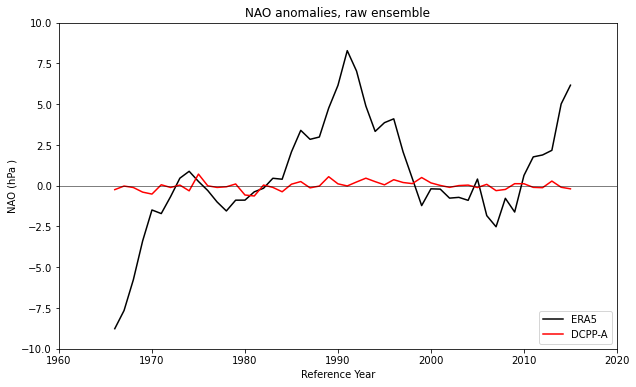

In [13]:
# plot the evolution of the NAO index with time
# first create the figure
fig = plt.figure(figsize=(10, 6))
# add the axes
ax = fig.add_subplot(111)
# plot the data
# now aligned, but still looks very slightly off compared to Doug's plot and Andrea's plot
# perhaps something to ask doug down the line
ax.plot(obs_time[3:], obs_nao_anom[3:], color="black", label="ERA5")
#ax.plot(obs_bl_time[3:], obs_bl_nao_anom[3:], color="black", label="ERA5 hindcast BL", linestyle="--")
ax.plot(model_time[:-4], model_nao_anom[:-4], color="red", label="DCPP-A")
ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
# set the x-axis limits
ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
# set the y-axis limits
ax.set_ylim([-10, 10])
# set the x-axis label
ax.set_xlabel("Reference Year")
# set the y-axis label
ax.set_ylabel("NAO (hPa )")
# set the title
ax.set_title("NAO anomalies, raw ensemble")
# add the legend in the bottom right corner
ax.legend(loc="lower right")
# save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/nao-anomaly-raw.png", dpi=300)
# show the figure
plt.show()


In [9]:
# Calculate the ACC and p-value
# cutoff 2010 - short period
ACC, p_value = pearsonr(obs_nao_anom[3:-5], model_nao_anom[:-9])
print("Anomaly Correlation Coefficient (ACC):", ACC)
print("P-value:", p_value)

Anomaly Correlation Coefficient (ACC): 0.39622496111567285
P-value: 0.0070510087848265676


In [11]:
# Shift model_nao_anom data back by 1 years
shifted_model_nao_anom = np.roll(model_nao_anom[:-4], -1)

# Remove the last year of data to avoid wraparound effects
shifted_model_nao_anom = shifted_model_nao_anom[:-1]

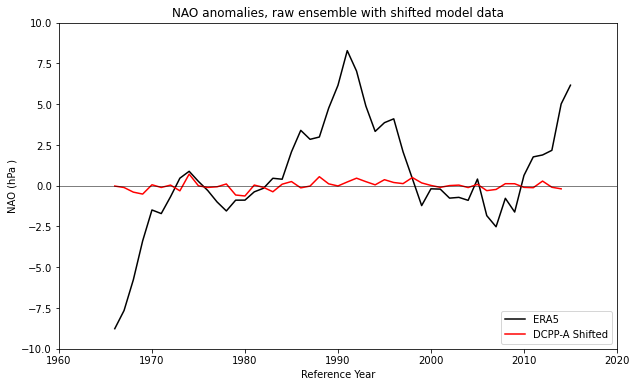

In [12]:
# now plot this
# Plot the evolution of the NAO index with time
# First create the figure
fig = plt.figure(figsize=(10, 6))
# Add the axes
ax = fig.add_subplot(111)
# Plot the data
ax.plot(obs_time[3:], obs_nao_anom[3:], color="black", label="ERA5")
ax.plot(model_time[:-5], shifted_model_nao_anom, color="red", label="DCPP-A Shifted")
ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
# Set the x-axis limits
ax.set_xlim([np.datetime64("1960"), np.datetime64("2020")])
# Set the y-axis limits
ax.set_ylim([-10, 10])
# Set the x-axis label
ax.set_xlabel("Reference Year")
# Set the y-axis label
ax.set_ylabel("NAO (hPa )")
# Set the title
ax.set_title("NAO anomalies, raw ensemble with shifted model data")
# Add the legend in the bottom right corner
ax.legend(loc="lower right")
# Save the figure
plt.savefig("/home/users/benhutch/multi-model/plots/nao-anomaly-shifted.png", dpi=300)
# Show the figure
plt.show()

In [13]:
# now calculate full field skill score for this
# Calculate the ACC and p-value with the shifted data
ACC_shifted, p_value_shifted = pearsonr(obs_nao_anom[3:-1], shifted_model_nao_anom)
print("Anomaly Correlation Coefficient (ACC) with shifted data:", ACC_shifted)
print("P-value with shifted data:", p_value_shifted)


Anomaly Correlation Coefficient (ACC) with shifted data: 0.41161140706869653
P-value with shifted data: 0.003299467320875538


In [14]:
# now calculate long time period (1960-2010) skill scores for this
ACC_shifted_long, p_value_shifted_long = pearsonr(obs_nao_anom[3:-6], shifted_model_nao_anom[:-5])
print("Anomaly Correlation Coefficient (ACC) with shifted data:", ACC_shifted_long)
print("P-value with shifted data:", p_value_shifted_long)

Anomaly Correlation Coefficient (ACC) with shifted data: 0.4551747440821704
P-value with shifted data: 0.0019061798889212363
